Previo: relación entre el campo magnético que pasa por el eje de un solenoide, y la corriente que circula por él (spoiler de F3...)

Sea S un solenoide como en la figura, e I la corriente que circula por él.

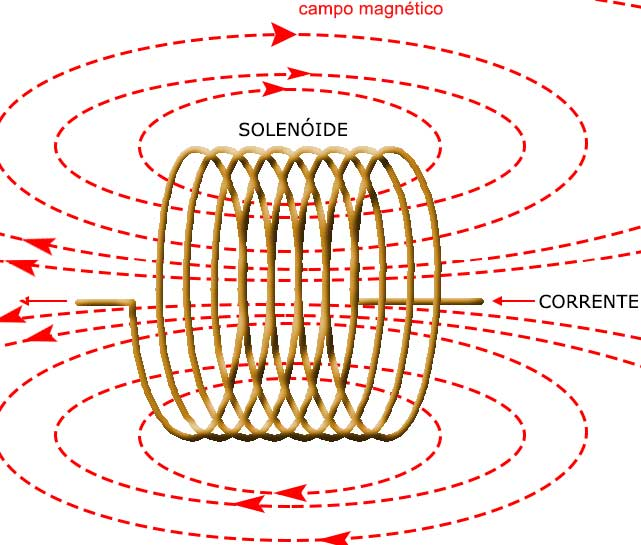

el módulo del campo magnético B en todo el eje del solenoide (suponiéndolo infinito en la sección de interés y el campo dentro de él uniforme), sigue la siguiente expresión:

$$B = \mu_0 \frac{N}{L} I$$

siendo mu_0 la constante de permeabilidad del vacío, N el número de vueltas y L el largo.

Podemos observar que si tomamos a $$\alpha=\mu_0\frac{N}{L}$$ como la pendiente, B e I mantienen una relación lineal.

En cualquier código, lo primero que debemos hacer es importar las librerías que necesitemos para trabajar. Generalmente no necesitarán más que estas:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

Primero anotamos los datos experimentales obtenidos (en el ejemplo medimos 10 veces)

In [3]:
# Datos de corriente (A)
I = np.array([0, 1.1, 2.7, 3.3, 4.2, 5.6, 6.7, 7.4, 8.9, 10.0])

# Datos de B experimentales
B_exp = np.array([0.00000e+00, 2.81e-03, 5.72e-03, 8.64e-03, 1.14e-02, 1.43e-02, 1.7e-02, 1.99e-02, 2.28e-02, 2.57e-02])

#incertidumbres: suponemos que la incertidumbre es solo tipo B, de la apreciación de la fuente y del sensor
mu_I = 0.1
mu_B = 0.001

Los ploteamos para ver la dependencia. Claramente observamos una relación lineal!!

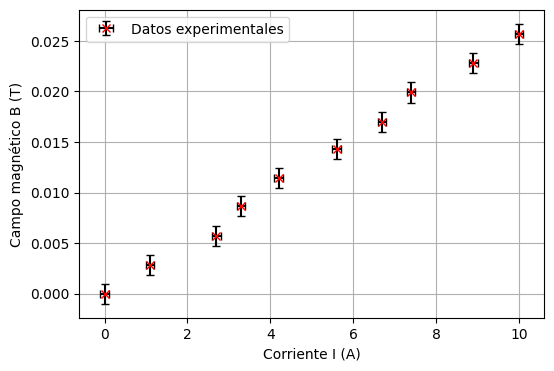

In [4]:
# Gráfico 1: Datos experimentales
plt.figure(figsize=(6,4))
plt.errorbar(I, B_exp, xerr=mu_I, yerr=mu_B, fmt='x', color='red', ecolor='black', capsize=3, label='Datos experimentales')
plt.xlabel('Corriente I (A)')
plt.ylabel('Campo magnético B (T)')
plt.legend()
plt.grid()
plt.show()

Ahora nos interesa superponer el modelo teórico para ver qué tan bien se ajusta la experiencia a la teoría.

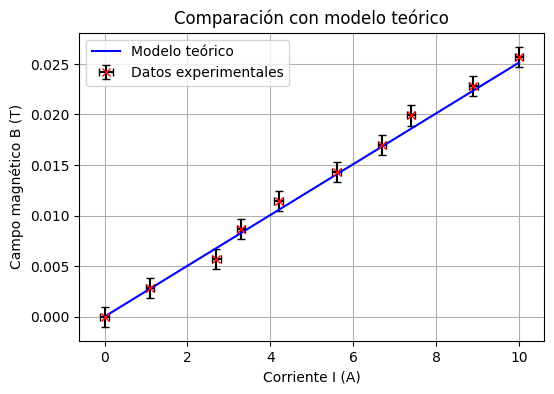

In [5]:
# Parámetros del solenoide
mu_0 = 4 * np.pi * 1e-7  # Permeabilidad del vacío (T·m/A)
N = 1000  # Número de vueltas
L = 0.5  # Longitud del solenoide (m)

I_teo = np.linspace(0,10,1000)

# Datos teóricos del campo magnético (T)
B_teorico = mu_0 * (N / L) * I_teo

# Gráfico 2: Datos experimentales y modelo teórico
plt.figure(figsize=(6,4))
plt.errorbar(I, B_exp, xerr=mu_I, yerr=mu_B, fmt='x', color='red', ecolor='black', capsize=3, label='Datos experimentales')
plt.plot(I_teo, B_teorico, color='blue', label='Modelo teórico')
plt.xlabel('Corriente I (A)')
plt.ylabel('Campo magnético B (T)')
plt.title('Comparación con modelo teórico')
plt.legend()
plt.grid()
plt.show()

Por último, realizamos el ajuste lineal

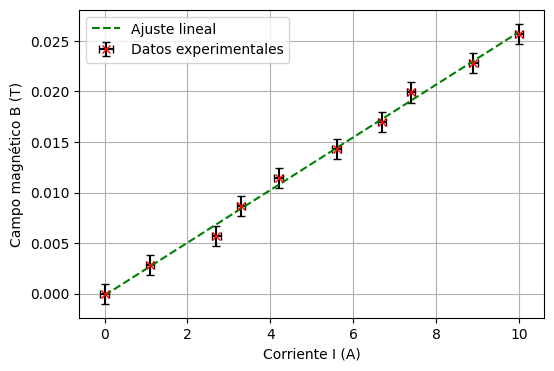

Pendiente del ajuste lineal: 0.002606
Parámetro R^2: 0.996129
Valor estimado de mu_0: (1.30e-06 ± 2.88e-08) T·m/A
valor de referencia de mu_0: (1.2566370614359173e-06) T·m/A 
Error relativo: 3.68%
Incertidumbre relativa: 2.21%


In [6]:
# Ajuste lineal
slope, intercept, r_value, _, mu_pend = linregress(I, B_exp)  #el _ es para que no me devuelva un valor que no voy a usar
mu_0_exp = slope * (L / N)  # Despejando mu_0 de la pendiente

#Cálculo de incertidumbre de mu_0 aplicando propagación

#Si la incertidumbre de L es 1mm se obtiene
sigma_L = 0.001
sigma_mu0 = np.sqrt((mu_pend * L / N)**2 + (slope * sigma_L / N)**2)

# Gráfico 3: Ajuste lineal
plt.figure(figsize=(6,4))
plt.errorbar(I, B_exp, xerr=mu_I, yerr=mu_B, fmt='x', color='red', ecolor='black', capsize=3, label='Datos experimentales')
plt.plot(I, slope * I + intercept, '--', color='green', label=f'Ajuste lineal')
plt.xlabel('Corriente I (A)')
plt.ylabel('Campo magnético B (T)')
plt.legend()
plt.grid()
plt.show()

print(f"Pendiente del ajuste lineal: {slope:.6f}")
print(f"Parámetro R^2: {r_value**2:.6f}")   #importante poner mínimo 4 decimales!! sino se redondea a 1 seguramente
print(f"Valor estimado de mu_0: ({mu_0_exp:.2e} ± {sigma_mu0:.2e}) T·m/A")
print(f"valor de referencia de mu_0: ({mu_0}) T·m/A ")


error = np.abs(mu_0-mu_0_exp)/mu_0*100
print(f"Error relativo: {error:.2f}%")

inc_rel = sigma_mu0/mu_0_exp*100
print(f"Incertidumbre relativa: {inc_rel:.2f}%")
